In [9]:
# import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stats
import json

In [10]:
# read data

metrics_data = pd.read_csv('metrics_data.csv')
number_matched_complexity_data = pd.read_csv('number_matched_complexity_data.csv')

In [11]:
# configuration of iterations per eligible problem

config = [
	(2, 3),
	(4, 3),
	(6, 3),
	(7, 2),
	(8, 6),
	(9, 2),
	(10, 3),
	(11, 6),
	(12, 4),
	(13, 6),
	(15, 3),
	(17, 6),
	(18, 4),
	(20, 2),
	(21, 6),
	(22, 5),
	(26, 6),
	(28, 3),
	(29, 2),
	(30, 2),
	(32, 2),
	(34, 2),
	(36, 3),
	(37, 5),
	(39, 2),
	(40, 2),
	(42, 3),
	(43, 2),
	(45, 3),
	(46, 2),
	(53, 4),
	(59, 6),
]

In [12]:
# initialize base data structures

iters = {
	"Cyclomatic Complexity": [],
	"Token Count": [],
	"Lines of Code": [],
	"Runtime (ms)": [],
	"Memory (MB)": [],
	"Best Case Time Complexity": [],
	"Average Case Time Complexity": [],
	"Worst Case Time Complexity": [],
	"Best Case Space Complexity": [],
	"Average Case Space Complexity": [],
	"Worst Case Space Complexity": [],
}

easy = {
	"Cyclomatic Complexity": [],
	"Token Count": [],
	"Lines of Code": [],
	"Runtime (ms)": [],
	"Memory (MB)": [],
	"Best Case Time Complexity": [],
	"Average Case Time Complexity": [],
	"Worst Case Time Complexity": [],
	"Best Case Space Complexity": [],
	"Average Case Space Complexity": [],
	"Worst Case Space Complexity": [],
}

medium = {
	"Cyclomatic Complexity": [],
	"Token Count": [],
	"Lines of Code": [],
	"Runtime (ms)": [],
	"Memory (MB)": [],
	"Best Case Time Complexity": [],
	"Average Case Time Complexity": [],
	"Worst Case Time Complexity": [],
	"Best Case Space Complexity": [],
	"Average Case Space Complexity": [],
	"Worst Case Space Complexity": [],
}

hard = {
	"Cyclomatic Complexity": [],
	"Token Count": [],
	"Lines of Code": [],
	"Runtime (ms)": [],
	"Memory (MB)": [],
	"Best Case Time Complexity": [],
	"Average Case Time Complexity": [],
	"Worst Case Time Complexity": [],
	"Best Case Space Complexity": [],
	"Average Case Space Complexity": [],
	"Worst Case Space Complexity": [],
}

refused = {
	"Cyclomatic Complexity": [],
	"Token Count": [],
	"Lines of Code": [],
	"Runtime (ms)": [],
	"Memory (MB)": [],
	"Best Case Time Complexity": [],
	"Average Case Time Complexity": [],
	"Worst Case Time Complexity": [],
	"Best Case Space Complexity": [],
	"Average Case Space Complexity": [],
	"Worst Case Space Complexity": [],
}

ongoing = {
	"Cyclomatic Complexity": [],
	"Token Count": [],
	"Lines of Code": [],
	"Runtime (ms)": [],
	"Memory (MB)": [],
	"Best Case Time Complexity": [],
	"Average Case Time Complexity": [],
	"Worst Case Time Complexity": [],
	"Best Case Space Complexity": [],
	"Average Case Space Complexity": [],
	"Worst Case Space Complexity": [],
}

wrong = {
	"Cyclomatic Complexity": [],
	"Token Count": [],
	"Lines of Code": [],
	"Runtime (ms)": [],
	"Memory (MB)": [],
	"Best Case Time Complexity": [],
	"Average Case Time Complexity": [],
	"Worst Case Time Complexity": [],
	"Best Case Space Complexity": [],
	"Average Case Space Complexity": [],
	"Worst Case Space Complexity": [],
}

first = {
	"Cyclomatic Complexity": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
	"Token Count": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
	"Lines of Code": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
	"Runtime (ms)": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
	"Memory (MB)": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
	"Best Case Time Complexity": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
	"Average Case Time Complexity": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
	"Worst Case Time Complexity": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
	"Best Case Space Complexity": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
	"Average Case Space Complexity": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
	"Worst Case Space Complexity": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
}

best = {
	"Cyclomatic Complexity": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
	"Token Count": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
	"Lines of Code": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
	"Runtime (ms)": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
	"Memory (MB)": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
	"Best Case Time Complexity": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
	"Average Case Time Complexity": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
	"Worst Case Time Complexity": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
	"Best Case Space Complexity": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
	"Average Case Space Complexity": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
	"Worst Case Space Complexity": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
}

last = {
	"Cyclomatic Complexity": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
	"Token Count": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
	"Lines of Code": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
	"Runtime (ms)": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
	"Memory (MB)": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
	"Best Case Time Complexity": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
	"Average Case Time Complexity": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
	"Worst Case Time Complexity": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
	"Best Case Space Complexity": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
	"Average Case Space Complexity": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
	"Worst Case Space Complexity": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
}

In [13]:
# populate base data structures

for metric, df, col in [
	("Cyclomatic Complexity", metrics_data, 2),
	("Token Count", metrics_data, 3),
	("Lines of Code", metrics_data, 4),
	("Runtime (ms)", metrics_data, 5),
	("Memory (MB)", metrics_data, 6),
	("Best Case Time Complexity", number_matched_complexity_data, 2),
	("Average Case Time Complexity", number_matched_complexity_data, 3),
	("Worst Case Time Complexity", number_matched_complexity_data, 4),
	("Best Case Space Complexity", number_matched_complexity_data, 5),
	("Average Case Space Complexity", number_matched_complexity_data, 6),
	("Worst Case Space Complexity", number_matched_complexity_data, 7),
]:

	count = 0
	for problem, iterations in config:
		iters[metric].append([])
		for i in range(iterations):
			iters[metric][-1].append(df.iloc[count, col])
			count += 1

	count = 0
	for problem, iterations in config:
		if 0 < problem <= 20:
			easy[metric].append([])
			for i in range(iterations):
				easy[metric][-1].append(df.iloc[count, col])
				count += 1
		elif 20 < problem <= 40:
			medium[metric].append([])
			for i in range(iterations):
				medium[metric][-1].append(df.iloc[count, col])
				count += 1
		elif 40 < problem <= 60:
			hard[metric].append([])
			for i in range(iterations):
				hard[metric][-1].append(df.iloc[count, col])
				count += 1

	count = 0
	for problem, iterations in config:
		if problem in [4, 10, 12, 15, 34, 37, 39, 42, 45]:
			refused[metric].append([])
			for i in range(iterations):
				refused[metric][-1].append(df.iloc[count, col])
				count += 1
		elif problem in [8, 11, 13, 17, 21, 26, 59]:
			ongoing[metric].append([])
			for i in range(iterations):
				ongoing[metric][-1].append(df.iloc[count, col])
				count += 1
		else:
			wrong[metric].append([])
			for i in range(iterations):
				wrong[metric][-1].append(df.iloc[count, col])
				count += 1
	
	for category, array in [("Easy", easy[metric]), ("Medium", medium[metric]), ("Hard", hard[metric]), ("Refused", refused[metric]), ("Ongoing", ongoing[metric]), ("Wrong", wrong[metric]), ("Overall", iters[metric])]:
		first[metric][category] = [line[0] for line in array]
		last[metric][category] = [line[-1] for line in array]
		best[metric][category] = [np.min(line) for line in array]


In [14]:
# wilcoxon signed-rank test statistics

wilcoxon_pvalues_best_first = {
	"Cyclomatic Complexity": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
	"Token Count": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
	"Lines of Code": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
	"Runtime (ms)": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
	"Memory (MB)": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
	"Best Case Time Complexity": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
	"Average Case Time Complexity": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
	"Worst Case Time Complexity": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
	"Best Case Space Complexity": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
	"Average Case Space Complexity": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
	"Worst Case Space Complexity": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
}

wilcoxon_pvalues_last_first = {
	"Cyclomatic Complexity": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
	"Token Count": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
	"Lines of Code": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
	"Runtime (ms)": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
	"Memory (MB)": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
	"Best Case Time Complexity": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
	"Average Case Time Complexity": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
	"Worst Case Time Complexity": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
	"Best Case Space Complexity": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
	"Average Case Space Complexity": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
	"Worst Case Space Complexity": {
		"Easy": [],
		"Medium": [],
		"Hard": [],
		"Refused": [],
		"Ongoing": [],
		"Wrong": [],
		"Overall": [],
	},
}

def calculate_wilcoxon(print_results=True):
	for metric in ["Cyclomatic Complexity", "Token Count", "Lines of Code", "Runtime (ms)", "Memory (MB)", "Best Case Time Complexity", "Average Case Time Complexity", "Worst Case Time Complexity", "Best Case Space Complexity", "Average Case Space Complexity", "Worst Case Space Complexity"]:
		for iteration_array, iteration_pvalue in [(last, wilcoxon_pvalues_last_first), (best, wilcoxon_pvalues_best_first)]:
			for category in ["Easy", "Medium", "Hard", "Refused", "Ongoing", "Wrong", "Overall"]:
				try:
					_, p_value = stats.wilcoxon(iteration_array[metric][category], first[metric][category], alternative='less')
					iteration_pvalue[metric][category] = p_value
				except Exception as e:
					iteration_pvalue[metric][category] = "NA"
	if print_results:
		print("LAST - FIRST: p-values obtained in Wilcoxon Signed-Rank tests with alternative hypothesis that metric values in the last iteration's solution are lower than those of the first iteration's solution.")
		print(json.dumps(wilcoxon_pvalues_last_first, indent=4))
		print("\nBEST - FIRST: p-values obtained in Wilcoxon Signed-Rank tests with alternative hypothesis that metric values in the best iteration's solution are lower than those of the first iteration's solution.")
		print(json.dumps(wilcoxon_pvalues_best_first, indent=4))

calculate_wilcoxon()


LAST - FIRST: p-values obtained in Wilcoxon Signed-Rank tests with alternative hypothesis that metric values in the last iteration's solution are lower than those of the first iteration's solution.
{
    "Cyclomatic Complexity": {
        "Easy": 0.6650923212002917,
        "Medium": 0.2071080891212626,
        "Hard": 0.13666083914614907,
        "Refused": 0.5,
        "Ongoing": 0.6726395769907115,
        "Wrong": 0.09036790468680284,
        "Overall": 0.26297450380056303
    },
    "Token Count": {
        "Easy": 0.5354585807761036,
        "Medium": 0.2500921285353972,
        "Hard": 0.34291521722580287,
        "Refused": 0.82738446411408,
        "Ongoing": 0.6424996726559553,
        "Wrong": 0.11191858234613433,
        "Overall": 0.32563954104072734
    },
    "Lines of Code": {
        "Easy": 0.7512888460583061,
        "Medium": 0.04223451612662591,
        "Hard": 0.23072549391668035,
        "Refused": 0.5,
        "Ongoing": 0.9487647825701253,
        "Wrong": 0.06

/opt/homebrew/lib/python3.11/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/homebrew/lib/python3.11/site-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


Cyclomatic Complexity
Average last-first, best-first = -0.21875, -0.78125
Median last-first, best-first = 0.0, 0.0
Minimum last-first, best-first = -5, -5
Maximum last-first, best-first = 5, 0

Token Count
Average last-first, best-first = 1.90625, -10.46875
Median last-first, best-first = 0.0, 0.0
Minimum last-first, best-first = -50, -50
Maximum last-first, best-first = 134, 0

Lines of Code
Average last-first, best-first = 0.125, -1.25
Median last-first, best-first = 0.0, 0.0
Minimum last-first, best-first = -5, -9
Maximum last-first, best-first = 15, 0


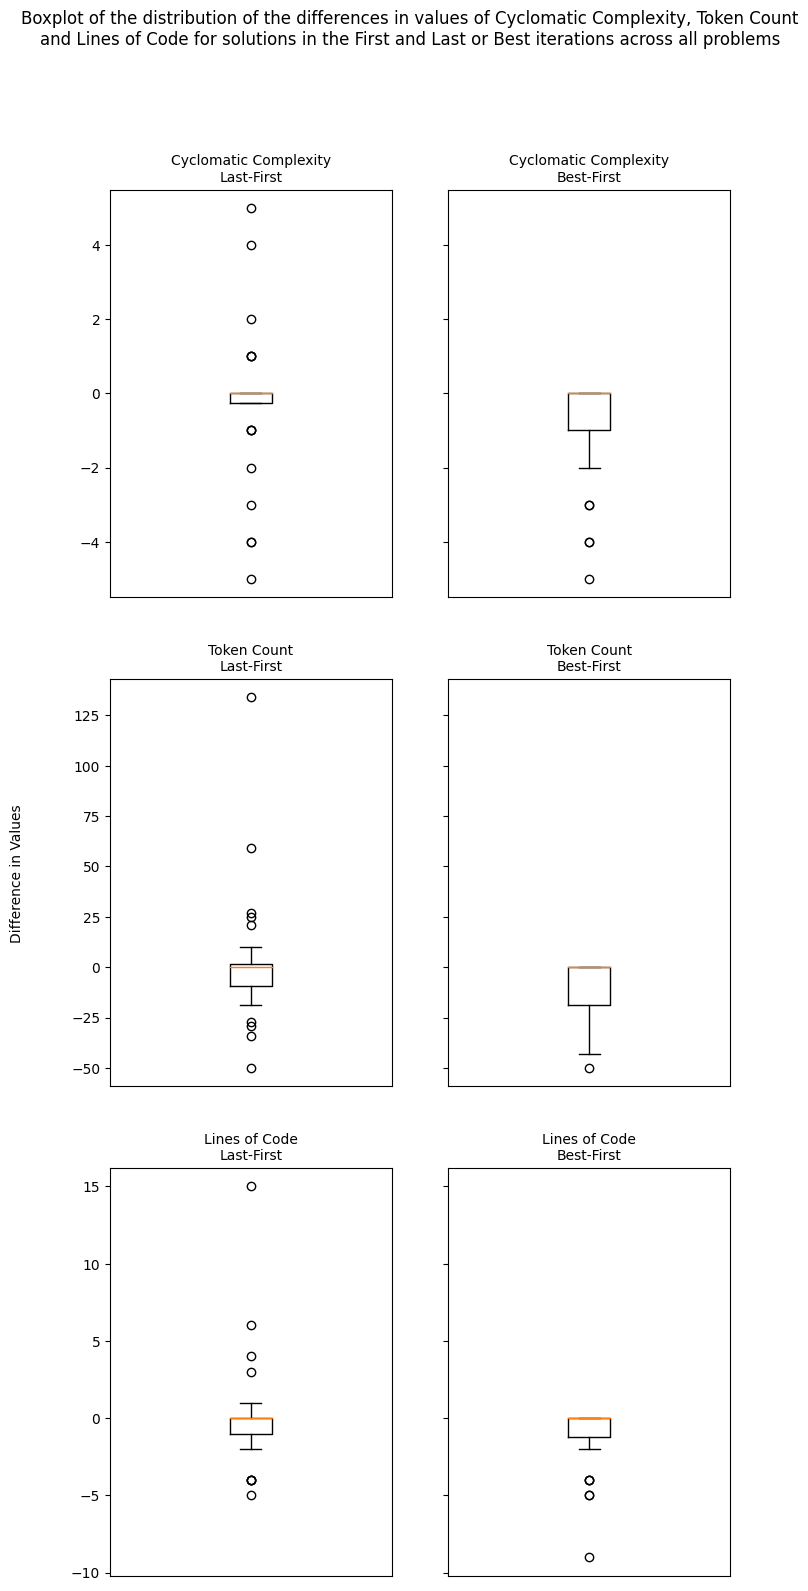

Last - First difference stats
{
    "Cyclomatic Complexity": {
        "Easy": {
            "Mean": 0.2857142857142857,
            "Median": 0.0,
            "Min": -4,
            "Max": 5
        },
        "Medium": {
            "Mean": -0.4166666666666667,
            "Median": 0.0,
            "Min": -5,
            "Max": 1
        },
        "Hard": {
            "Mean": -1.0,
            "Median": -0.5,
            "Min": -4,
            "Max": 2
        },
        "Refused": {
            "Mean": 0.0,
            "Median": 0.0,
            "Min": -4,
            "Max": 4
        },
        "Ongoing": {
            "Mean": 0.5714285714285714,
            "Median": 0.0,
            "Min": -1,
            "Max": 5
        },
        "Wrong": {
            "Mean": -0.6875,
            "Median": 0.0,
            "Min": -5,
            "Max": 2
        },
        "Overall": {
            "Mean": -0.21875,
            "Median": 0.0,
            "Min": -5,
            "Max": 5
    

In [15]:
# plot last/best - first metric value differences

# (to fix json serialization error)
# ref: https://sebhastian.com/python-object-of-type-int64-is-not-json-serializable/
class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)

def plot_difference_distributions(show_plot=True, print_stats_overview=True, print_stats_verbose=True):
	mpl.rcParams['font.size'] = 10
	fig, axs = plt.subplots(3, 2, figsize=(8, 18), sharey='row')
	first_last = [last["Cyclomatic Complexity"]["Overall"][i] - first["Cyclomatic Complexity"]["Overall"][i] for i in range(len(first["Cyclomatic Complexity"]["Overall"]))]
	first_best = [best["Cyclomatic Complexity"]["Overall"][i] - first["Cyclomatic Complexity"]["Overall"][i] for i in range(len(first["Cyclomatic Complexity"]["Overall"]))]
	
	if print_stats_overview:
		print("Cyclomatic Complexity")
		print(f"Average last-first, best-first = {np.mean(first_last)}, {np.mean(first_best)}")
		print(f"Median last-first, best-first = {np.median(first_last)}, {np.median(first_best)}")
		print(f"Minimum last-first, best-first = {np.min(first_last)}, {np.min(first_best)}")
	print(f"Maximum last-first, best-first = {np.max(first_last)}, {np.max(first_best)}")
	
	axs[0, 0].boxplot(first_last)
	axs[0, 0].set_title("Cyclomatic Complexity\nLast-First", fontdict={'fontsize': 10})
	axs[0, 1].boxplot(first_best)
	axs[0, 1].set_title("Cyclomatic Complexity\nBest-First", fontdict={'fontsize': 10})
	axs[0, 0].get_xaxis().set_visible(False)
	axs[0, 1].get_xaxis().set_visible(False)
	first_last = [last["Token Count"]["Overall"][i] - first["Token Count"]["Overall"][i] for i in range(len(first["Token Count"]["Overall"]))]
	first_best = [best["Token Count"]["Overall"][i] - first["Token Count"]["Overall"][i] for i in range(len(first["Token Count"]["Overall"]))]
	
	if print_stats_overview:
		print("\nToken Count")
		print(f"Average last-first, best-first = {np.mean(first_last)}, {np.mean(first_best)}")
		print(f"Median last-first, best-first = {np.median(first_last)}, {np.median(first_best)}")
		print(f"Minimum last-first, best-first = {np.min(first_last)}, {np.min(first_best)}")
		print(f"Maximum last-first, best-first = {np.max(first_last)}, {np.max(first_best)}")
	
	axs[1, 0].boxplot(first_last)
	axs[1, 0].set_title("Token Count\nLast-First", fontdict={'fontsize': 10})
	axs[1, 1].boxplot(first_best)
	axs[1, 1].set_title("Token Count\nBest-First", fontdict={'fontsize': 10})
	axs[1, 0].get_xaxis().set_visible(False)
	axs[1, 1].get_xaxis().set_visible(False)
	first_last = [last["Lines of Code"]["Overall"][i] - first["Lines of Code"]["Overall"][i] for i in range(len(first["Lines of Code"]["Overall"]))]
	first_best = [best["Lines of Code"]["Overall"][i] - first["Lines of Code"]["Overall"][i] for i in range(len(first["Lines of Code"]["Overall"]))]
	
	if print_stats_overview:
		print("\nLines of Code")
		print(f"Average last-first, best-first = {np.mean(first_last)}, {np.mean(first_best)}")
		print(f"Median last-first, best-first = {np.median(first_last)}, {np.median(first_best)}")
		print(f"Minimum last-first, best-first = {np.min(first_last)}, {np.min(first_best)}")
		print(f"Maximum last-first, best-first = {np.max(first_last)}, {np.max(first_best)}")
	
	axs[2, 0].boxplot(first_last)
	axs[2, 0].set_title("Lines of Code\nLast-First", fontdict={'fontsize': 10})
	axs[2, 1].boxplot(first_best)
	axs[2, 1].set_title("Lines of Code\nBest-First", fontdict={'fontsize': 10})
	axs[2, 0].get_xaxis().set_visible(False)
	axs[2, 1].get_xaxis().set_visible(False)
	fig.suptitle(f"Boxplot of the distribution of the differences in values of Cyclomatic Complexity, Token Count\nand Lines of Code for solutions in the First and Last or Best iterations across all problems")
	fig.text(0.0, 0.5, 'Difference in Values', va='center', rotation='vertical')
	
	if show_plot:
		plt.show()
	
	if print_stats_verbose:
		first_last = {}
		first_best = {}
		for metric in ["Cyclomatic Complexity", "Token Count", "Lines of Code", "Runtime (ms)", "Memory (MB)", "Best Case Time Complexity", "Average Case Time Complexity", "Worst Case Time Complexity", "Best Case Space Complexity", "Average Case Space Complexity", "Worst Case Space Complexity"]:
			first_last[metric] = {}
			first_best[metric] = {}
			for category in ["Easy", "Medium", "Hard", "Refused", "Ongoing", "Wrong", "Overall"]:
				first_last[metric][category] = {}
				first_best[metric][category] = {}

				first_last_differences = [last[metric][category][i] - first[metric][category][i] for i in range(len(first[metric][category]))]
				first_best_differences = [best[metric][category][i] - first[metric][category][i] for i in range(len(first[metric][category]))]

				first_last[metric][category]["Mean"] = np.mean(first_last_differences)
				first_last[metric][category]["Median"] = np.median(first_last_differences)
				first_last[metric][category]["Min"] = np.min(first_last_differences)
				first_last[metric][category]["Max"] = np.max(first_last_differences)

				first_best[metric][category]["Mean"] = np.mean(first_best_differences)
				first_best[metric][category]["Median"] = np.median(first_best_differences)
				first_best[metric][category]["Min"] = np.min(first_best_differences)
				first_best[metric][category]["Max"] = np.max(first_best_differences)
		
		print("Last - First difference stats")
		print(json.dumps(first_last, indent=4, cls=NpEncoder))
		print("\nBest - First difference stats")
		print(json.dumps(first_best, indent=4, cls=NpEncoder))

plot_difference_distributions()

In [16]:
# last <-> best relation stats

best_is_first = {
	"Cyclomatic Complexity": {
		"Easy": 0,
		"Medium": 0,
		"Hard": 0,
		"Refused": 0,
		"Ongoing": 0,
		"Wrong": 0,
		"Overall": 0,
	},
	"Token Count": {
		"Easy": 0,
		"Medium": 0,
		"Hard": 0,
		"Refused": 0,
		"Ongoing": 0,
		"Wrong": 0,
		"Overall": 0,
	},
	"Lines of Code": {
		"Easy": 0,
		"Medium": 0,
		"Hard": 0,
		"Refused": 0,
		"Ongoing": 0,
		"Wrong": 0,
		"Overall": 0,
	},
	"Runtime (ms)": {
		"Easy": 0,
		"Medium": 0,
		"Hard": 0,
		"Refused": 0,
		"Ongoing": 0,
		"Wrong": 0,
		"Overall": 0,
	},
	"Memory (MB)": {
		"Easy": 0,
		"Medium": 0,
		"Hard": 0,
		"Refused": 0,
		"Ongoing": 0,
		"Wrong": 0,
		"Overall": 0,
	},
	"Best Case Time Complexity": {
		"Easy": 0,
		"Medium": 0,
		"Hard": 0,
		"Refused": 0,
		"Ongoing": 0,
		"Wrong": 0,
		"Overall": 0,
	},
	"Average Case Time Complexity": {
		"Easy": 0,
		"Medium": 0,
		"Hard": 0,
		"Refused": 0,
		"Ongoing": 0,
		"Wrong": 0,
		"Overall": 0,
	},
	"Worst Case Time Complexity": {
		"Easy": 0,
		"Medium": 0,
		"Hard": 0,
		"Refused": 0,
		"Ongoing": 0,
		"Wrong": 0,
		"Overall": 0,
	},
	"Best Case Space Complexity": {
		"Easy": 0,
		"Medium": 0,
		"Hard": 0,
		"Refused": 0,
		"Ongoing": 0,
		"Wrong": 0,
		"Overall": 0,
	},
	"Average Case Space Complexity": {
		"Easy": 0,
		"Medium": 0,
		"Hard": 0,
		"Refused": 0,
		"Ongoing": 0,
		"Wrong": 0,
		"Overall": 0,
	},
	"Worst Case Space Complexity": {
		"Easy": 0,
		"Medium": 0,
		"Hard": 0,
		"Refused": 0,
		"Ongoing": 0,
		"Wrong": 0,
		"Overall": 0,
	},
}

best_is_last = {
	"Cyclomatic Complexity": {
		"Easy": 0,
		"Medium": 0,
		"Hard": 0,
		"Refused": 0,
		"Ongoing": 0,
		"Wrong": 0,
		"Overall": 0,
	},
	"Token Count": {
		"Easy": 0,
		"Medium": 0,
		"Hard": 0,
		"Refused": 0,
		"Ongoing": 0,
		"Wrong": 0,
		"Overall": 0,
	},
	"Lines of Code": {
		"Easy": 0,
		"Medium": 0,
		"Hard": 0,
		"Refused": 0,
		"Ongoing": 0,
		"Wrong": 0,
		"Overall": 0,
	},
	"Runtime (ms)": {
		"Easy": 0,
		"Medium": 0,
		"Hard": 0,
		"Refused": 0,
		"Ongoing": 0,
		"Wrong": 0,
		"Overall": 0,
	},
	"Memory (MB)": {
		"Easy": 0,
		"Medium": 0,
		"Hard": 0,
		"Refused": 0,
		"Ongoing": 0,
		"Wrong": 0,
		"Overall": 0,
	},
	"Best Case Time Complexity": {
		"Easy": 0,
		"Medium": 0,
		"Hard": 0,
		"Refused": 0,
		"Ongoing": 0,
		"Wrong": 0,
		"Overall": 0,
	},
	"Average Case Time Complexity": {
		"Easy": 0,
		"Medium": 0,
		"Hard": 0,
		"Refused": 0,
		"Ongoing": 0,
		"Wrong": 0,
		"Overall": 0,
	},
	"Worst Case Time Complexity": {
		"Easy": 0,
		"Medium": 0,
		"Hard": 0,
		"Refused": 0,
		"Ongoing": 0,
		"Wrong": 0,
		"Overall": 0,
	},
	"Best Case Space Complexity": {
		"Easy": 0,
		"Medium": 0,
		"Hard": 0,
		"Refused": 0,
		"Ongoing": 0,
		"Wrong": 0,
		"Overall": 0,
	},
	"Average Case Space Complexity": {
		"Easy": 0,
		"Medium": 0,
		"Hard": 0,
		"Refused": 0,
		"Ongoing": 0,
		"Wrong": 0,
		"Overall": 0,
	},
	"Worst Case Space Complexity": {
		"Easy": 0,
		"Medium": 0,
		"Hard": 0,
		"Refused": 0,
		"Ongoing": 0,
		"Wrong": 0,
		"Overall": 0,
	},
}

neither = {
	"Cyclomatic Complexity": {
		"Easy": 0,
		"Medium": 0,
		"Hard": 0,
		"Refused": 0,
		"Ongoing": 0,
		"Wrong": 0,
		"Overall": 0,
	},
	"Token Count": {
		"Easy": 0,
		"Medium": 0,
		"Hard": 0,
		"Refused": 0,
		"Ongoing": 0,
		"Wrong": 0,
		"Overall": 0,
	},
	"Lines of Code": {
		"Easy": 0,
		"Medium": 0,
		"Hard": 0,
		"Refused": 0,
		"Ongoing": 0,
		"Wrong": 0,
		"Overall": 0,
	},
	"Runtime (ms)": {
		"Easy": 0,
		"Medium": 0,
		"Hard": 0,
		"Refused": 0,
		"Ongoing": 0,
		"Wrong": 0,
		"Overall": 0,
	},
	"Memory (MB)": {
		"Easy": 0,
		"Medium": 0,
		"Hard": 0,
		"Refused": 0,
		"Ongoing": 0,
		"Wrong": 0,
		"Overall": 0,
	},
	"Best Case Time Complexity": {
		"Easy": 0,
		"Medium": 0,
		"Hard": 0,
		"Refused": 0,
		"Ongoing": 0,
		"Wrong": 0,
		"Overall": 0,
	},
	"Average Case Time Complexity": {
		"Easy": 0,
		"Medium": 0,
		"Hard": 0,
		"Refused": 0,
		"Ongoing": 0,
		"Wrong": 0,
		"Overall": 0,
	},
	"Worst Case Time Complexity": {
		"Easy": 0,
		"Medium": 0,
		"Hard": 0,
		"Refused": 0,
		"Ongoing": 0,
		"Wrong": 0,
		"Overall": 0,
	},
	"Best Case Space Complexity": {
		"Easy": 0,
		"Medium": 0,
		"Hard": 0,
		"Refused": 0,
		"Ongoing": 0,
		"Wrong": 0,
		"Overall": 0,
	},
	"Average Case Space Complexity": {
		"Easy": 0,
		"Medium": 0,
		"Hard": 0,
		"Refused": 0,
		"Ongoing": 0,
		"Wrong": 0,
		"Overall": 0,
	},
	"Worst Case Space Complexity": {
		"Easy": 0,
		"Medium": 0,
		"Hard": 0,
		"Refused": 0,
		"Ongoing": 0,
		"Wrong": 0,
		"Overall": 0,
	},
}

def best_solution_position_stats(print_results=True):
	for metric in ["Cyclomatic Complexity", "Token Count", "Lines of Code", "Runtime (ms)", "Memory (MB)", "Best Case Time Complexity", "Average Case Time Complexity", "Worst Case Time Complexity", "Best Case Space Complexity", "Average Case Space Complexity", "Worst Case Space Complexity"]:
		for category in ["Easy", "Medium", "Hard", "Refused", "Ongoing", "Wrong", "Overall"]:
			best_is_first[metric][category] = np.mean([1 if best[metric][category][i] == first[metric][category][i] else 0 for i in range(len(best[metric][category]))])
			best_is_last[metric][category] = np.mean([1 if best[metric][category][i] == last[metric][category][i] else 0 for i in range(len(best[metric][category]))])
			neither[metric][category] = np.mean([1 if best[metric][category][i] != first[metric][category][i] and best[metric][category][i] != last[metric][category][i] else 0 for i in range(len(best[metric][category]))])

	if print_results:
		print("Proportion of problems where first solution is best")
		print(json.dumps(best_is_first, indent=4))
		print("\nProportion of problems where last solution is best")
		print(json.dumps(best_is_last, indent=4))
		print("\nProportion of problems where neither first nor last solution is best")
		print(json.dumps(neither, indent=4))
	

best_solution_position_stats()

Proportion of problems where first solution is best
{
    "Cyclomatic Complexity": {
        "Easy": 0.6428571428571429,
        "Medium": 0.8333333333333334,
        "Hard": 0.5,
        "Refused": 0.6666666666666666,
        "Ongoing": 0.7142857142857143,
        "Wrong": 0.6875,
        "Overall": 0.6875
    },
    "Token Count": {
        "Easy": 0.42857142857142855,
        "Medium": 0.75,
        "Hard": 0.5,
        "Refused": 0.6666666666666666,
        "Ongoing": 0.5714285714285714,
        "Wrong": 0.5,
        "Overall": 0.5625
    },
    "Lines of Code": {
        "Easy": 0.5714285714285714,
        "Medium": 0.5833333333333334,
        "Hard": 0.6666666666666666,
        "Refused": 0.6666666666666666,
        "Ongoing": 0.7142857142857143,
        "Wrong": 0.5,
        "Overall": 0.59375
    },
    "Runtime (ms)": {
        "Easy": 0.2857142857142857,
        "Medium": 0.25,
        "Hard": 0.3333333333333333,
        "Refused": 0.4444444444444444,
        "Ongoing": 0.0,
